<a href="https://colab.research.google.com/github/RayOfLight07/Deep-Learning/blob/main/DL_LAB_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning Lab_________________________________________________________________________Name: Deepasnhu Rathore     
B.Tech. 5th Sem.
#**Experiment:- 11**
# Image Reconstruction and Feature Compression Using Autoencoders

Date:18\11\2025____________________________________________________________________________________SAP: 500124406

# **AIM**

**Aim**: To implement a standard Autoencoder using TensorFlow/Keras to perform image reconstruction on the MNIST handwritten digit dataset.

# **Objective**

*   To understand the Encoder-Decoder architecture.

*   To analyze how deep neural networks can perform dimensionality reduction (feature compression) by learning a compressed latent representation.

*   To evaluate the quality of reconstructed images compared to original inputs.

# **Theory**

An Autoencoder is a type of unsupervised artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction.

It consists of two main parts:

**Encoder:** Maps the input $x$ to a lower-dimensional feature vector (latent space representation) $h$. This forces the network to learn the most important features and discard noise.
$$h = f(x)$$

**Decoder:** Maps the latent space representation $h$ back to a reconstruction of the input $\hat{x}$.
$$\hat{x} = g(h)$$

The network is trained to minimize the reconstruction error (Loss), usually Mean Squared Error (MSE) or Binary Crossentropy, between the input $x$ and the output $\hat{x}$.

## **Algorithm:**


1.   Input: Load the MNIST dataset (28x28 pixel images).
2.   Preprocessing:

     *   Normalize pixel values to the range [0, 1].

     *   Flatten the 2D images (28x28) into 1D vectors (784 dimensions).



3.   Model Architecture:

     *   Input Layer: 784 neurons.

     *   Encoding Layer (Bottleneck): Reduce dimensionality (e.g., to 32 neurons). This represents the compressed features.

     *   Decoding Layer: Expand dimensionality back to 784 neurons.



4.   Training: Train the model using x_train as both the input and the target (Self-supervised learning).

5.   Evaluation: Pass test images through the trained autoencoder and visualize the reconstructed output alongside the original image.





In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


# **Load and Preprocess Data**
This cell loads the MNIST dataset, normalizes the pixel values (0 to 1), and flattens the 2D images into 1D vectors.

In [3]:
# Load the dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images:
# Original shape: (60000, 28, 28) -> New shape: (60000, 784)
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

print(f"Training Data Shape: {x_train.shape}")
print(f"Testing Data Shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Data Shape: (60000, 784)
Testing Data Shape: (10000, 784)


# **Define the Autoencoder Model**
This cell defines the architecture. We compress the 784 inputs down to 32 neurons (Encoder), and then expand them back to 784 (Decoder).

In [4]:
# Dimension of the latent space (compressed feature)
encoding_dim = 32

# Input placeholder
input_img = tf.keras.Input(shape=(784,))

# Encoder Layer
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Decoder Layer
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Autoencoder Model (Input -> Reconstructed Output)
autoencoder = models.Model(input_img, decoded)

# Encoder Model (Input -> Encoded Representation) - useful for visualization
encoder = models.Model(input_img, encoded)

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

# **Compile and Train**
This takes about 1-2 minutes. We use x_train as both input and target because this is unsupervised learning.

In [5]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
print("Starting training...")
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
print("Training complete.")

Starting training...
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3822 - val_loss: 0.1883
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1791 - val_loss: 0.1524
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1481 - val_loss: 0.1318
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1299 - val_loss: 0.1195
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1188 - val_loss: 0.1116
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1112 - val_loss: 0.1060
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1060 - val_loss: 0.1019
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1025 - val_loss: 0.0988
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0995 - val_loss: 0.0967
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0976 - val_loss: 0.0953
Training complete.


# **Visualize Results and Loss**
This cell generates the comparison images (Original vs. Reconstructed) and plots the training loss graph.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


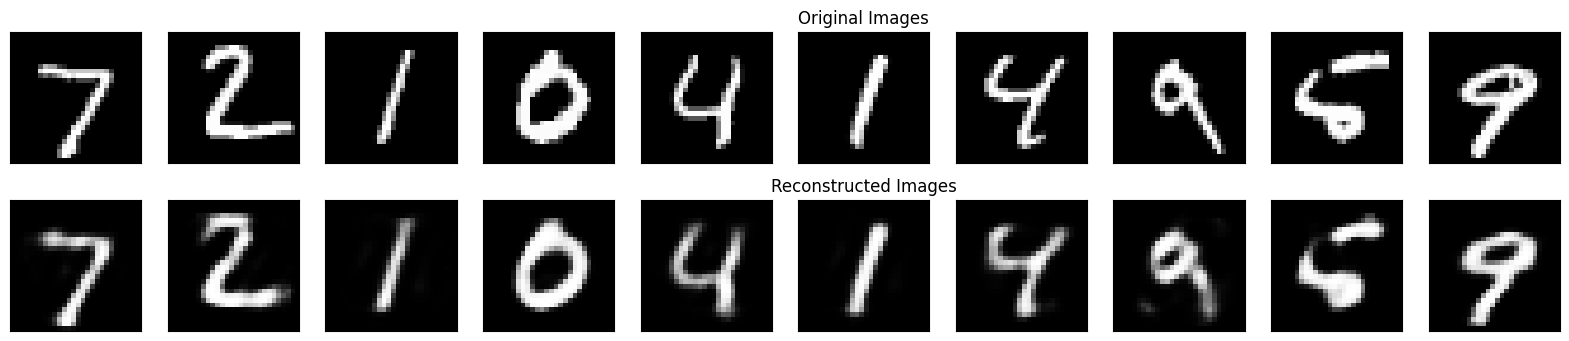

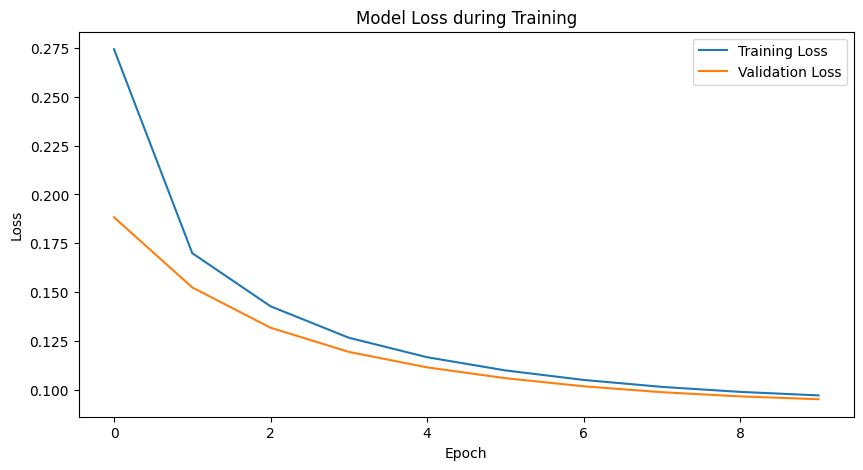

In [6]:
# 1. Generate reconstructions
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# 2. Plot Original vs Reconstructed Images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Original Images')

    # Display Reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Reconstructed Images')
plt.show()

# 3. Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## **Observations**

*   **Loss Convergence:** The Binary Crossentropy loss decreased steadily over 10 epochs, indicating the model successfully learned to approximate the identity function.

*   **Compression:** The input dimension of 784 was compressed to a latent dimension of 32. This is a compression ratio of approximately 24:1.

*   **Visual Quality:** As seen in the generated plot, the reconstructed digits are slightly blurrier than the originals (due to information loss during compression) but are fully recognizable and retain the structural integrity of the digits.

# **Conclusion**

 In this experiment, we successfully designed and evaluated a standard Autoencoder. The model demonstrated that it is possible to compress data significantly into a lower-dimensional latent space and reconstruct it with high fidelity. This confirms the utility of Autoencoders for feature extraction and data compression tasks.